In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")

In [2]:
import warnings

# Suppress specific PerformanceWarning from pandas
warnings.filterwarnings(action='ignore', category=pd.errors.PerformanceWarning)

In [3]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import read_multi_model_data

In [4]:
# directory with data
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_flank_core_compatibility"

In [5]:
df = read_multi_model_data(data_dir)

Model:  0
	 - bg: 1
	 - bg: 2
	 - bg: 3
	 - bg: 4
	 - bg: 5
	 - bg: 6
	 - bg: 7
	 - bg: 8
	 - bg: 9
Model:  1
	 - bg: 0
	 - bg: 1
	 - bg: 2
	 - bg: 3
	 - bg: 4
	 - bg: 5
	 - bg: 6
	 - bg: 7
	 - bg: 8
	 - bg: 9
Model:  2
	 - bg: 0
	 - bg: 1
	 - bg: 2
	 - bg: 3
	 - bg: 4
	 - bg: 5
	 - bg: 6
	 - bg: 7
	 - bg: 8
	 - bg: 9
Model:  3
	 - bg: 0
	 - bg: 1
	 - bg: 2
	 - bg: 3
	 - bg: 4
	 - bg: 5
	 - bg: 6
	 - bg: 7
	 - bg: 8
	 - bg: 9


# Plotting matrix sorted by Insertion SCD of Cores and Flanks

In [6]:
df = df.drop(columns=[f"SCD_m{m_ind}_bg{bg_ind}" for m_ind in range(4) for bg_ind in range(10)])
df = df.drop(columns=[f"INS-16_m{m_ind}_bg{bg_ind}" for m_ind in range(4) for bg_ind in range(10)])
df = df.drop(columns=[f"INS-64_m{m_ind}_bg{bg_ind}" for m_ind in range(4) for bg_ind in range(10)])

In [7]:
df_sorted = df.sort_values(by=['insertion_SCD_core', 'insertion_SCD_flank'], ascending=False)

In [8]:
MATRIX = np.zeros((300,300))

In [9]:
unique_core_starts = df_sorted.start_core.unique()

In [10]:
for core_id in range(len(unique_core_starts)):
    core_start = unique_core_starts[core_id]
    MATRIX[core_id,:] += df_sorted[df_sorted["start_core"] == core_start].SCD

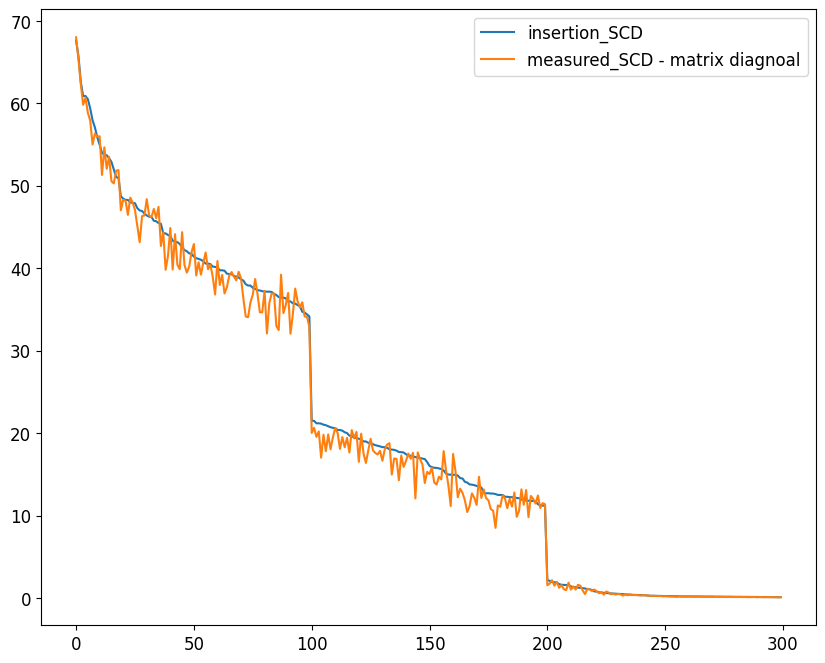

In [11]:
# how the values drop along diagonal

plt.figure(figsize=(10,8))
x = [x for x in range(300)]

plt.plot(x, df_sorted[df_sorted["start_core"] == 37357852].insertion_SCD_flank, label="insertion_SCD")
plt.plot(x, np.diag(MATRIX), label="measured_SCD - matrix diagnoal")

plt.legend()

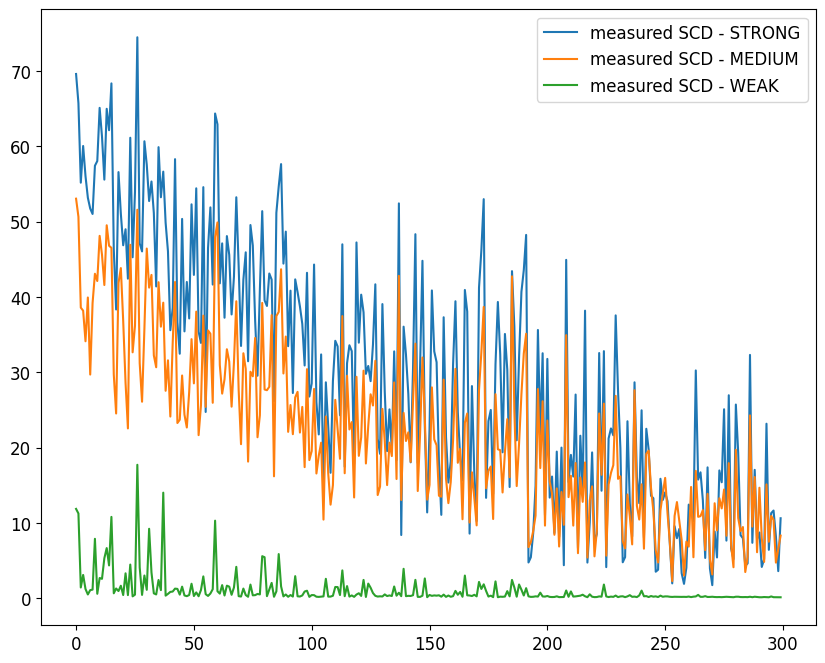

In [12]:
# how the values drop along rows

plt.figure(figsize=(10,8))
x = [x for x in range(300)]

plt.plot(x, MATRIX[50,:], label="measured SCD - STRONG")
plt.plot(x, MATRIX[150,:], label="measured SCD - MEDIUM")
plt.plot(x, MATRIX[250,:], label="measured SCD - WEAK")

plt.legend()
# plt.xlabel("Seq index in matrix")
# plt.ylabel("SCD")

In [13]:
# set up global color scale
global_vmin = 0
global_vmax = 95

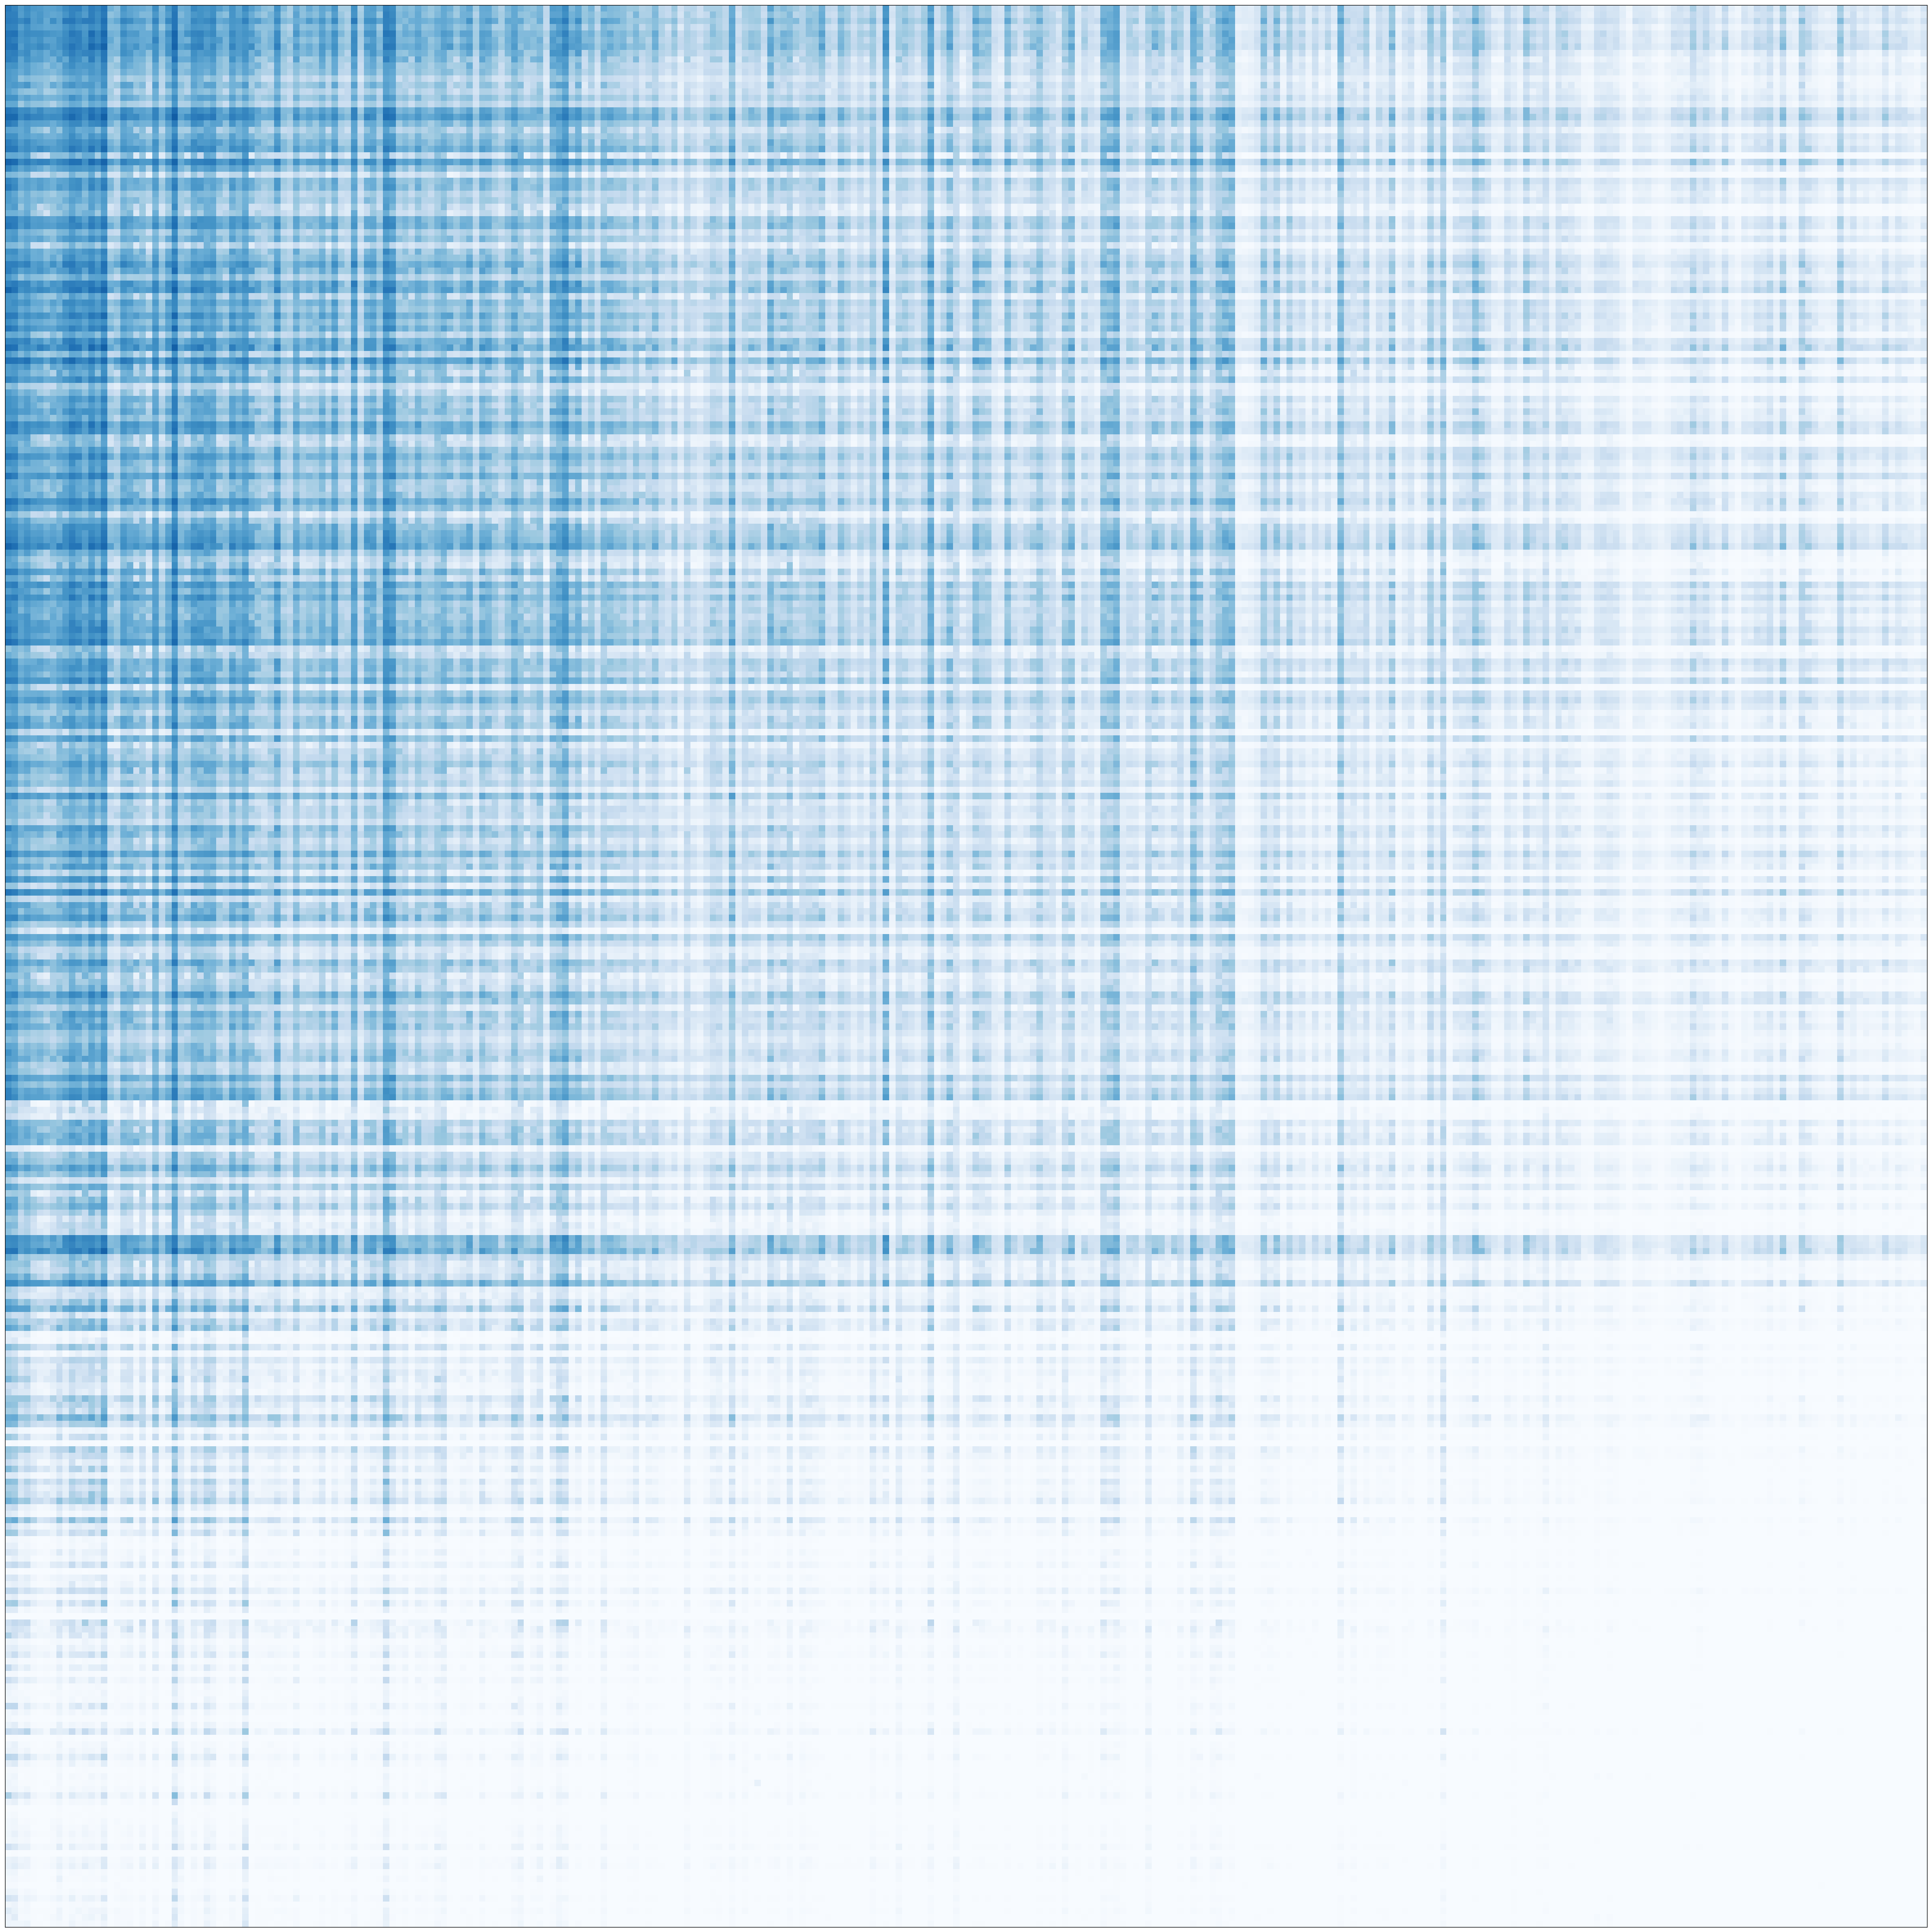

In [15]:
fig, ax = plt.subplots()
# colormap = "YlOrBr"
colormap = "Blues"
im = ax.imshow(MATRIX, cmap=colormap, vmin=global_vmin, vmax=global_vmax)

fig.set_figheight(50)
fig.set_figwidth(50)

# cax = plt.axes([0.90, 0.110, 0.0075, 0.18])
# cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap), cax=cax, ticks=[0, 0.5, 1])

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# cbar.ax.set_yticklabels([str(global_vmin), 
#                          str(round(((global_vmax - global_vmin)/2),1)), 
#                          str(global_vmax)])

# Draw vertical and horizontal lines to divide the matrix into 9 equal parts
# for line_position in [100, 200]:
#     ax.axvline(x=line_position - 0.5, color='black', linewidth=20)  # Adjust line color/width as needed
#     ax.axhline(y=line_position - 0.5, color='black', linewidth=20)  # Adjust line color/width as needed

# plt.savefig("./plots/core_flank_compatibility_matrix.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Summary Plot

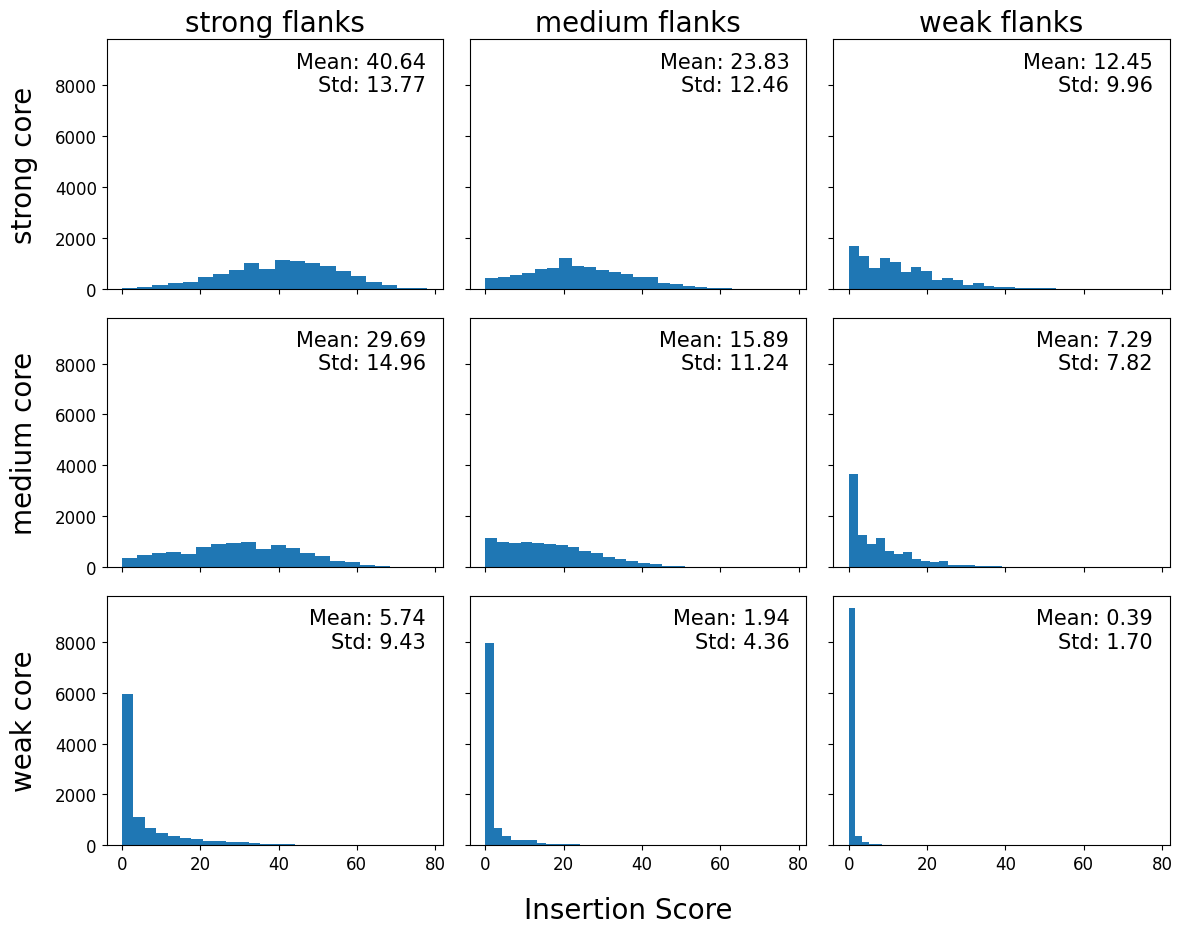

In [16]:
# Assuming MATRIX is a numpy array with your data
fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, tight_layout=True, figsize=(12, 9))

num_bins = 20

# Data segments
segments = [
    (0, 100, 0, 100),   # strong core, strong flanks
    (0, 100, 100, 200), # strong core, medium flanks
    (0, 100, 200, 300), # strong core, weak flanks
    (100, 200, 0, 100), # medium core, strong flanks
    (100, 200, 100, 200),# medium core, medium flanks
    (100, 200, 200, 300),# medium core, weak flanks
    (200, 300, 0, 100), # weak core, strong flanks
    (200, 300, 100, 200),# weak core, medium flanks
    (200, 300, 200, 300) # weak core, weak flanks
]

# Plot histograms and calculate mean & std, then annotate
for (i, j), (r_start, r_end, c_start, c_end) in zip(np.ndindex(axs.shape), segments):
    data = MATRIX[r_start:r_end, c_start:c_end].flatten().astype(int)
    mean = data.mean()
    std = data.std()
    
    axs[i, j].hist(data, bins=num_bins)
    axs[i, j].text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}', transform=axs[i, j].transAxes,
                   verticalalignment='top', horizontalalignment='right', fontsize=15)

cols = ["strong flanks", "medium flanks", "weak flanks"]
rows = ["strong core", "medium core", "weak core"]

for ax, col in zip(axs[0], cols):
    ax.set_title(col, size=20)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, fontsize=20, labelpad=12)

# Adding a common X-axis label
fig.text(0.53, -0.03, 'Insertion Score', ha='center', fontsize=20)

plt.show()

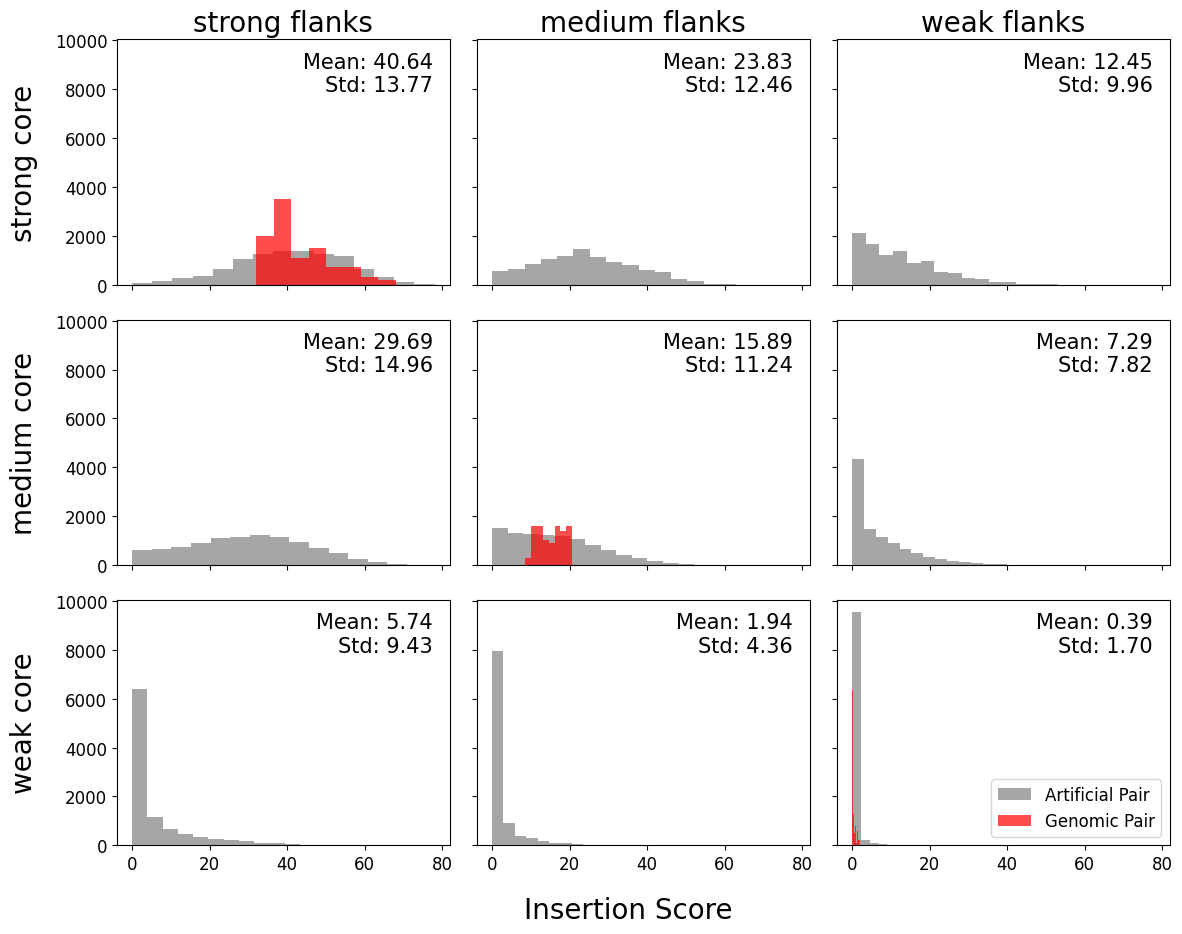

In [17]:
# Assuming MATRIX is a numpy array with your data
fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, tight_layout=True, figsize=(12, 9))
num_bins_nondiag = 15
num_bins_diag = 8

# Data segments
segments = [
    (0, 100, 0, 100),   # strong core, strong flanks
    (0, 100, 100, 200), # strong core, medium flanks
    (0, 100, 200, 300), # strong core, weak flanks
    (100, 200, 0, 100), # medium core, strong flanks
    (100, 200, 100, 200),# medium core, medium flanks
    (100, 200, 200, 300),# medium core, weak flanks
    (200, 300, 0, 100), # weak core, strong flanks
    (200, 300, 100, 200),# weak core, medium flanks
    (200, 300, 200, 300) # weak core, weak flanks
]

diag_indices = np.arange(100)

for (i, j), (r_start, r_end, c_start, c_end) in zip(np.ndindex(axs.shape), segments):
    # Extract the full segment
    matrix_chunk = MATRIX[r_start:r_end, c_start:c_end]
    full_data = matrix_chunk.flatten().astype(int)

    mean = full_data.mean()
    std = full_data.std()
    
    # Identify and separate the diagonal if it's a square segment (for core regions)
    if (r_end == c_end) and (r_start == c_start):
        diag_values = np.diag(MATRIX)[r_start:r_end]
        # masking diagonal
        mask = np.eye(matrix_chunk.shape[0], dtype=bool)
        non_diag_data = np.ma.masked_array(matrix_chunk, mask).flatten().astype(int)
        # non_diag_data = np.delete(np.delete(matrix_chunk, diag_indices, axis=0), diag_indices, axis=1)
        # non_diag_data = non_diag_data.flatten().astype(int)
    else:
        non_diag_data = full_data
        diag_values = []
    
    # Plot histogram for non-diagonal data
    axs[i, j].hist(non_diag_data, bins=num_bins_nondiag, label='Artificial Pair', color='grey', alpha=0.7)
    
    if (r_end == c_end) and (r_start == c_start):
        _weights = np.ones((100)) * 100
        axs[i, j].hist(diag_values, bins=num_bins_diag, weights=_weights, color='red', alpha=0.7, label='Genomic Pair')
    
    # Annotation for mean and std
    axs[i, j].text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}', transform=axs[i, j].transAxes,
                   verticalalignment='top', horizontalalignment='right', fontsize=15)

# Setting titles and labels as before
cols = ["strong flanks", "medium flanks", "weak flanks"]
rows = ["strong core", "medium core", "weak core"]
for ax, col in zip(axs[0], cols):
    ax.set_title(col, size=20)
for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, fontsize=20, labelpad=12)
fig.text(0.53, -0.03, 'Insertion Score', ha='center', fontsize=20)

# Optionally, display a legend in the first subplot to explain colors
axs[2, 2].legend(loc='lower right')

# plt.savefig("./plots/core_flank_compatibility_summary.pdf", format="pdf", bbox_inches="tight")
plt.show()

# SVD

In [18]:
U, Sigma, VT = np.linalg.svd(MATRIX.astype(int))

In [19]:
# Extract the first singular value and vectors for rank-1 approximation
sigma1 = Sigma[0]
u1 = U[:, 0]
v1 = VT.T[:, 0]

In [20]:
# Rank-1 approximation of A
A_approx = sigma1 * np.outer(u1, v1)

In [21]:
A_approx.max(), A_approx.min()

(95.08692246429155, -0.0)

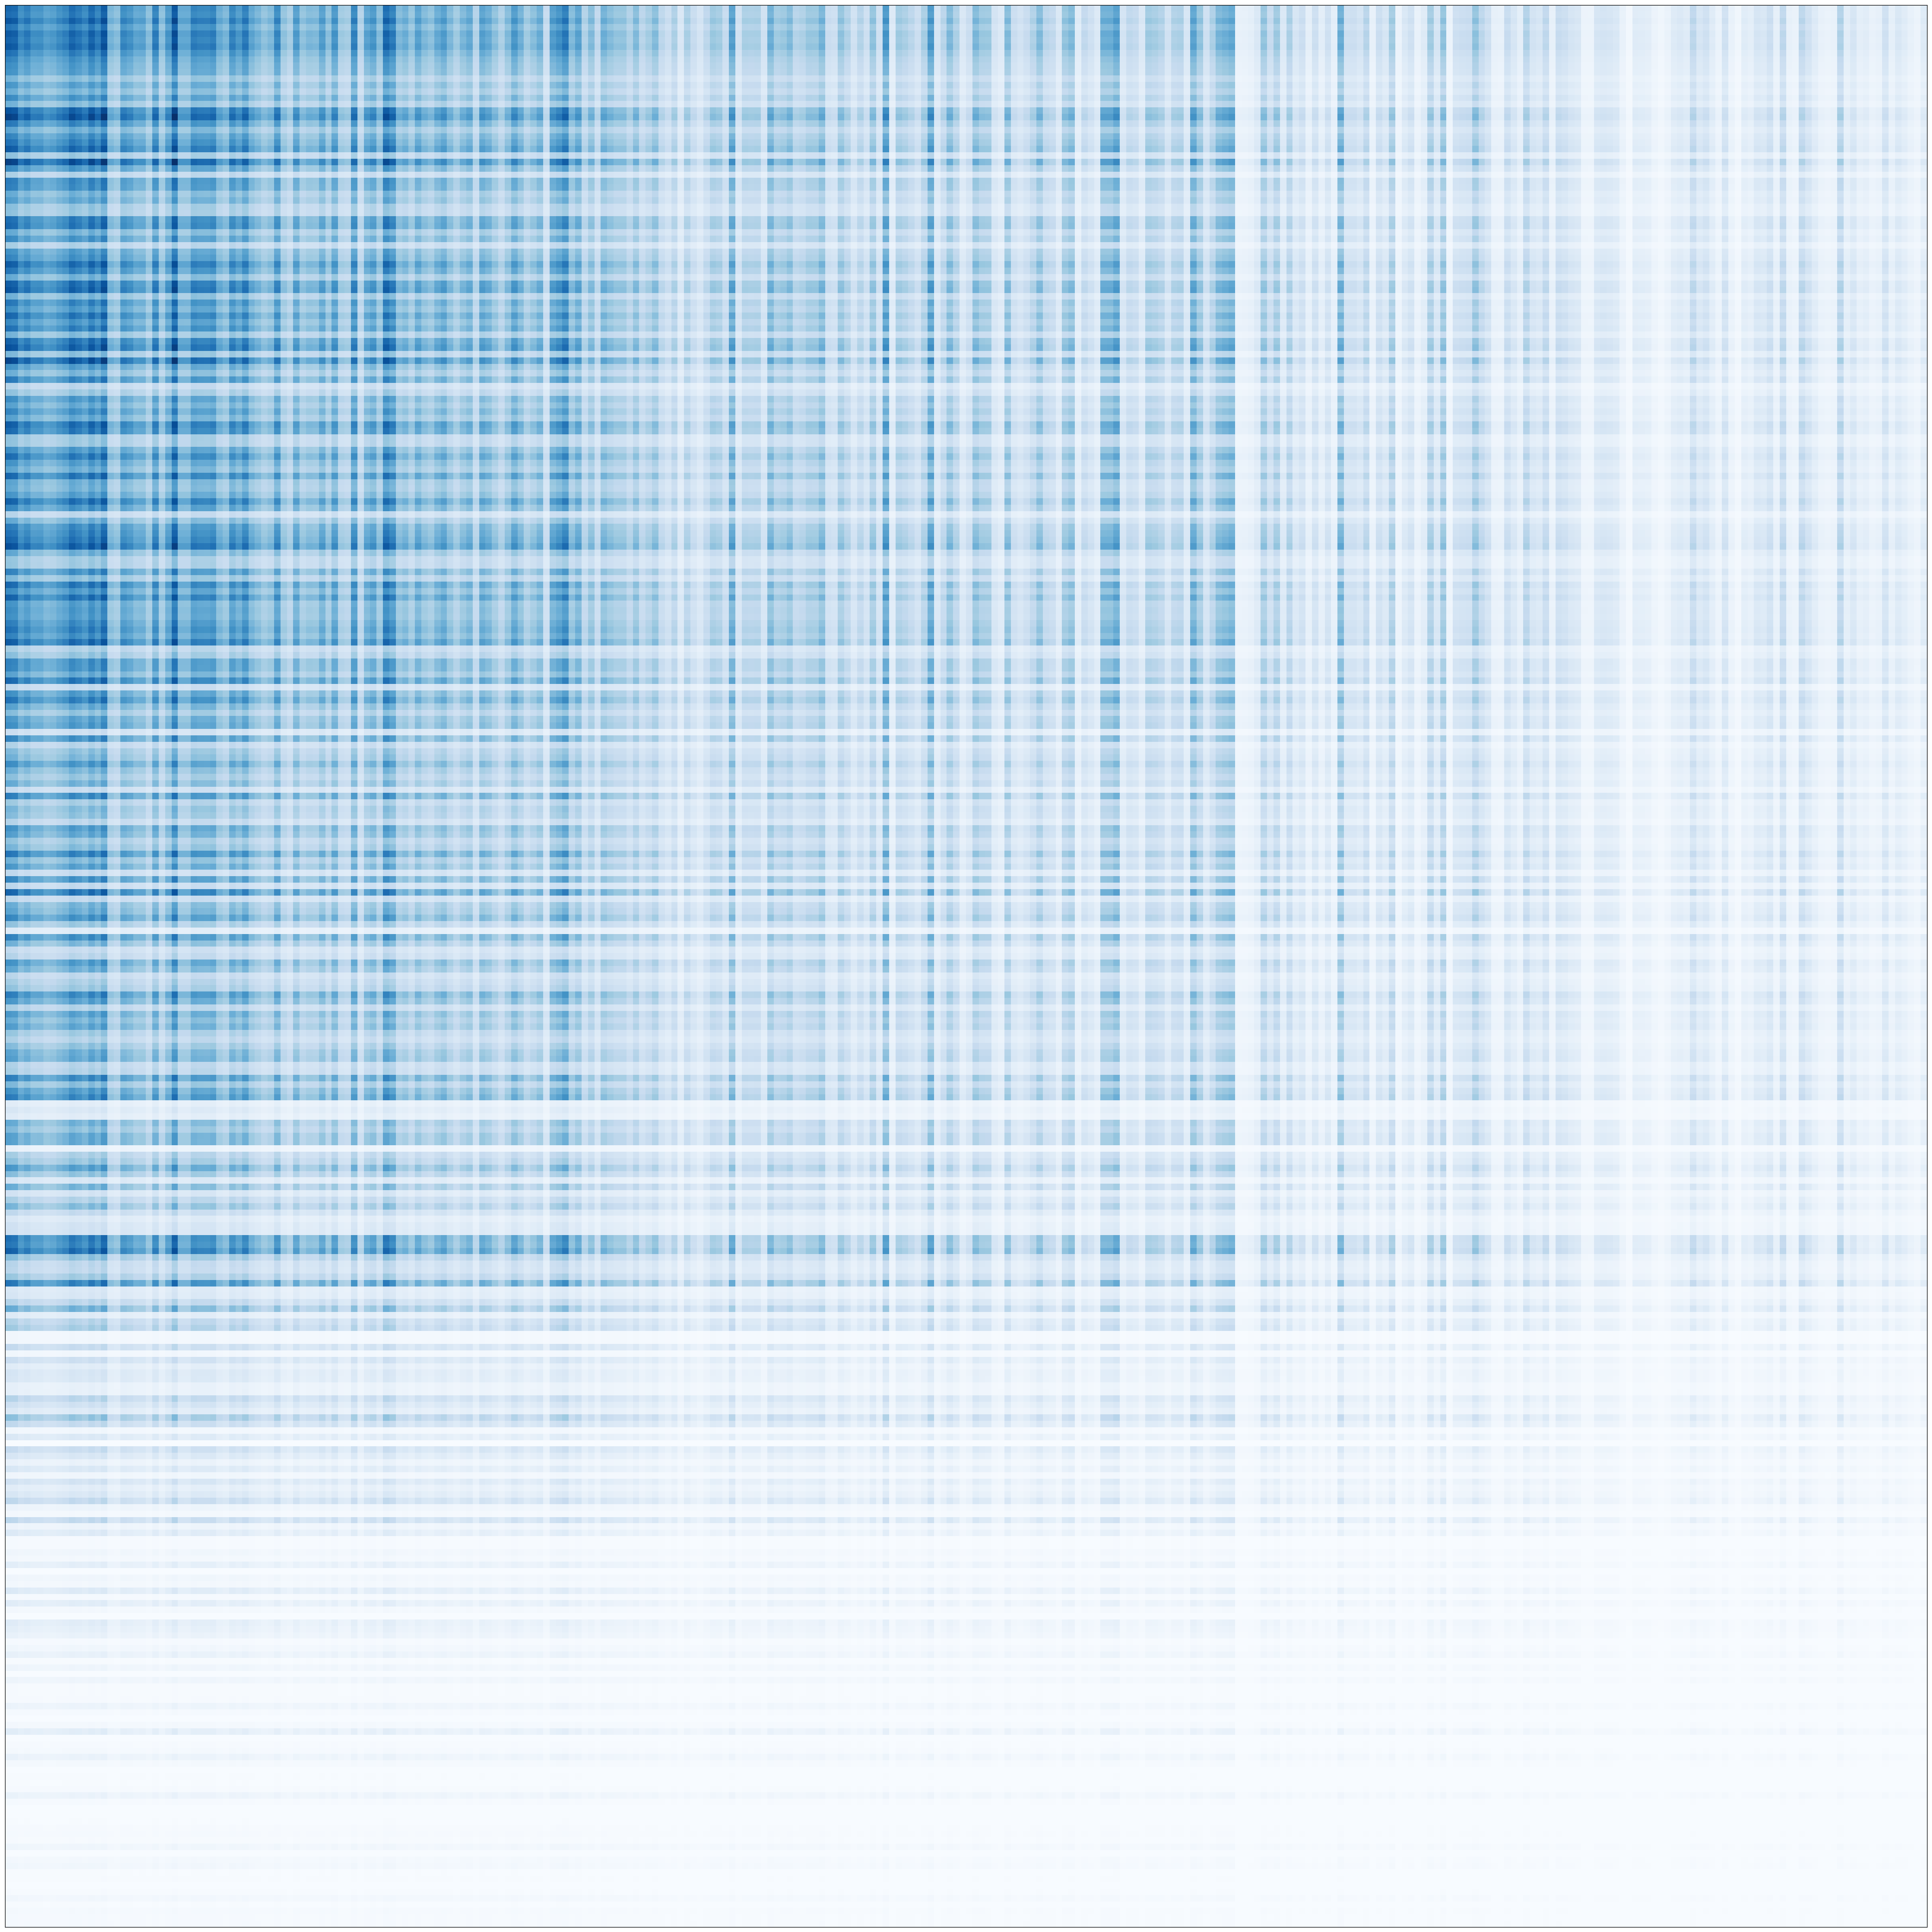

In [25]:
fig, ax = plt.subplots()
im = ax.imshow(A_approx, cmap=colormap, vmin=global_vmin, vmax=global_vmax)

fig.set_figheight(50)
fig.set_figwidth(52)

# cax = plt.axes([0.90, 0.110, 0.02, 0.38])
# cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap), cax=cax, ticks=[0, 0.25, 0.5, 0.75, 1])

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# cbar.ax.set_yticklabels([str(global_vmin), 
#                          str(int(((global_vmax - global_vmin)*0.25))),
#                          str(int(((global_vmax - global_vmin)/2))), 
#                         str(int(((global_vmax - global_vmin)*0.75))),
#                          str(global_vmax)], fontsize=35)

# for line_position in [100, 200]:
#     ax.axvline(x=line_position - 0.5, color='black', linewidth=20)  # Adjust line color/width as needed
#     ax.axhline(y=line_position - 0.5, color='black', linewidth=20)  # Adjust line color/width as needed

plt.savefig("./plots/core_flank_compatibility_SVD.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Difference between predicted and approximated matrices

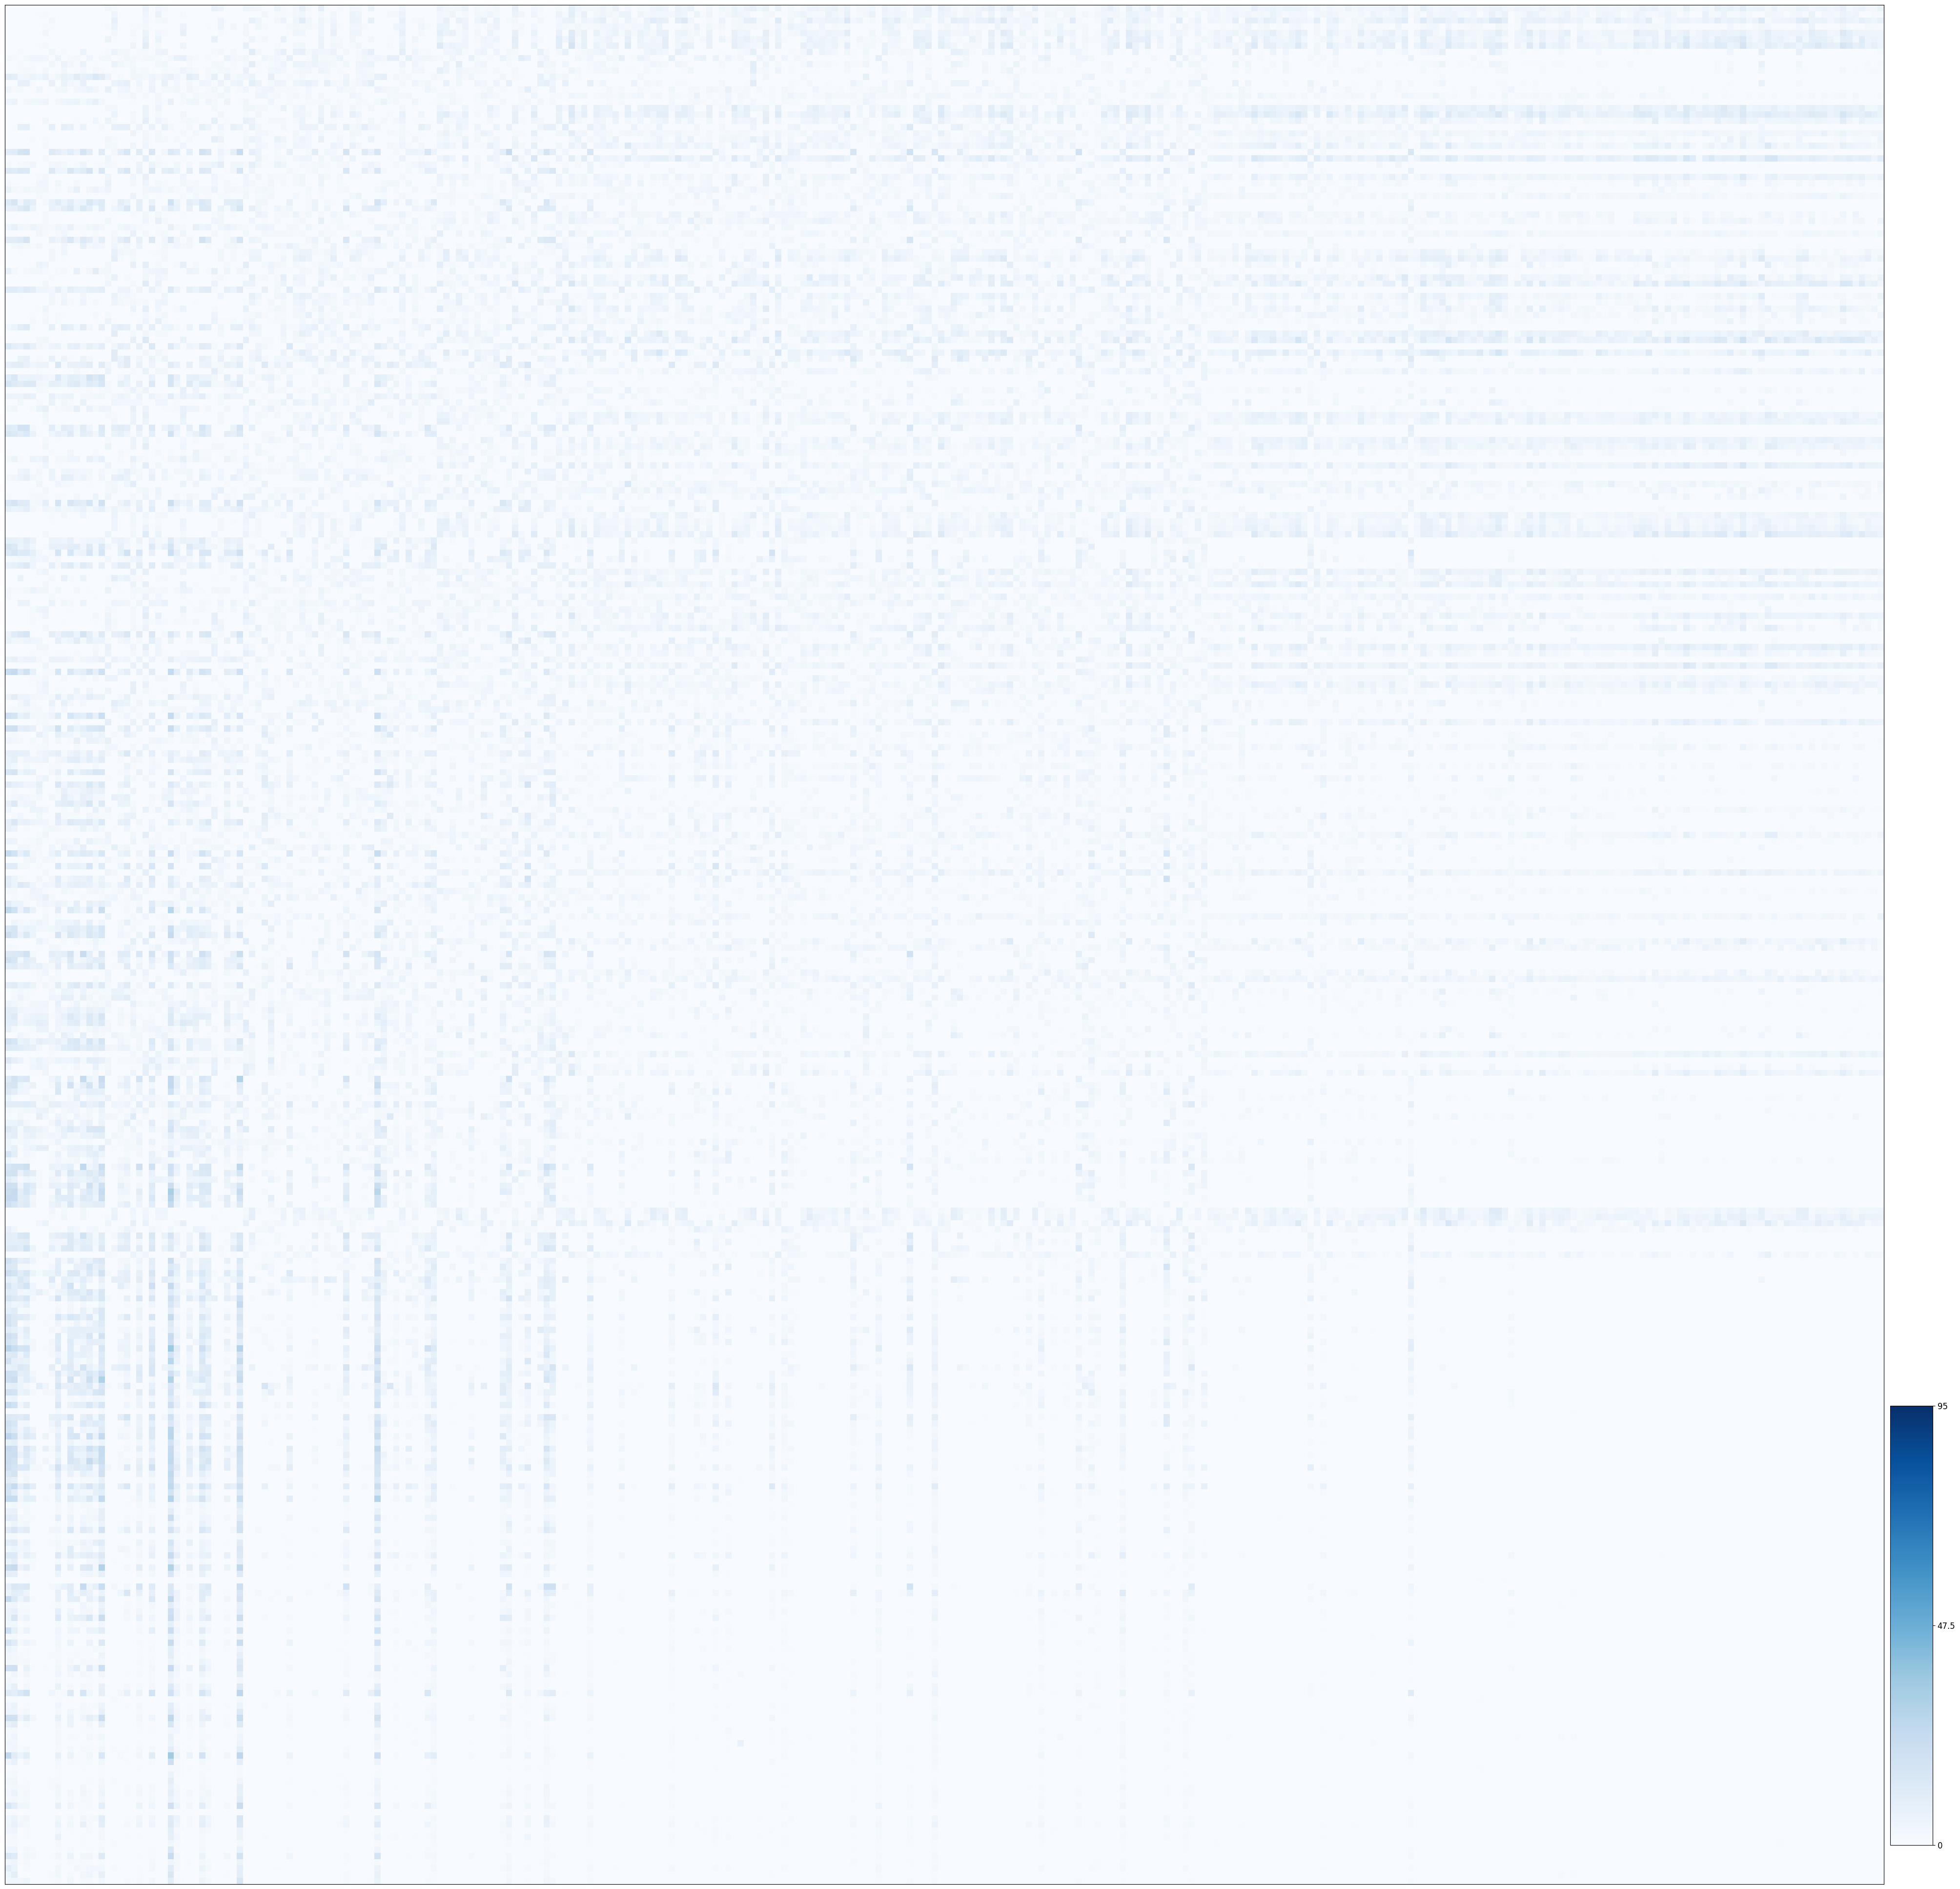

In [26]:
fig, ax = plt.subplots()
im = ax.imshow(MATRIX-A_approx, cmap=colormap, vmin=global_vmin, vmax=global_vmax)

fig.set_figheight(50)
fig.set_figwidth(50)

cax = plt.axes([0.90, 0.126, 0.0175, 0.18])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap), cax=cax, ticks=[0, 0.5, 1])

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

cbar.ax.set_yticklabels([str(global_vmin), 
                         str(round(((global_vmax - global_vmin)/2),1)), 
                         str(global_vmax)])
plt.show()

# Scatter Plot of Observed vs. Expected

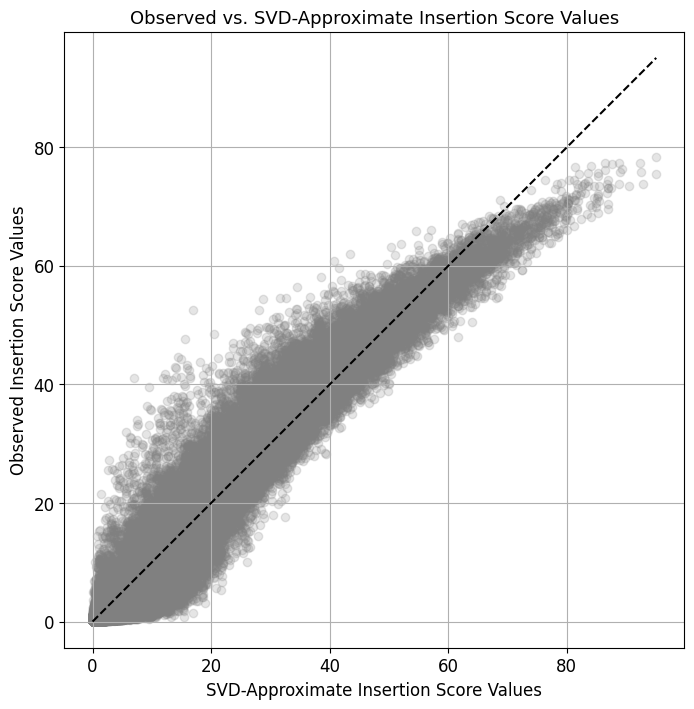

In [27]:
obs_values = MATRIX.flatten()
pred_values = (A_approx).flatten()

# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(pred_values, obs_values, color='grey', alpha=0.2)
plt.title('Observed vs. SVD-Approximate Insertion Score Values')
plt.ylabel('Observed Insertion Score Values')
plt.xlabel('SVD-Approximate Insertion Score Values')
plt.grid(True)

# Add a line representing perfect correlation (y = x)
max_val = max(np.max(obs_values), np.max(pred_values))
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')

# Ensure the plot is square by setting equal aspect ratio
plt.axis('equal')

# plt.savefig("./plots/observed_vs_expected.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Showing correlation between averaged insertion score for cores and flanks and singular vectors from (SVD)

In [28]:
# Calculate the average strength of each core (row averages)
row_averages = np.mean(MATRIX, axis=1)

# Calculate the average strength of each flanking sequence (column averages)
column_averages = np.mean(MATRIX, axis=0)

Text(0.5, 0, 'row_averages')

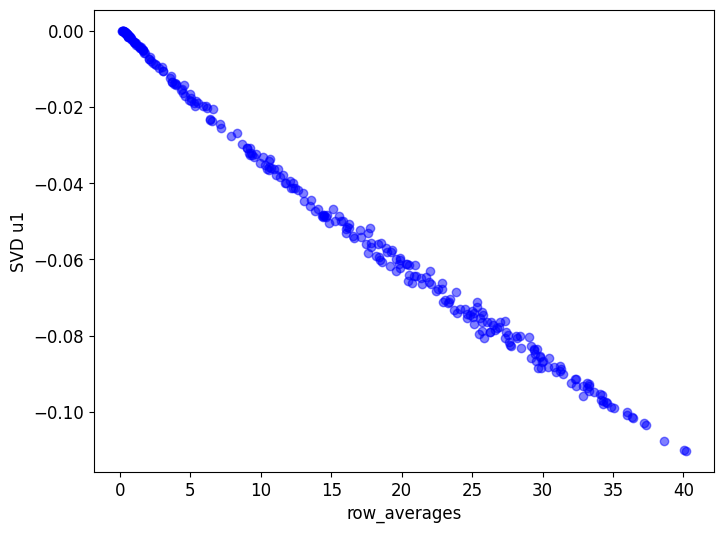

In [29]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(row_averages, u1, color='blue', alpha=0.5)
# plt.title('Observed vs. SVD Approximate')
plt.ylabel('SVD u1')
plt.xlabel('row_averages')

Text(0.5, 0, 'column_averages')

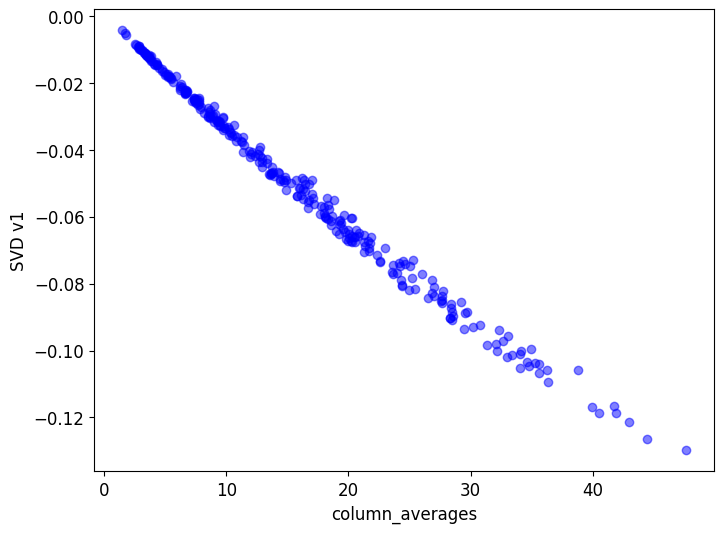

In [30]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(column_averages, v1, color='blue', alpha=0.5)
# plt.title('Observed vs. SVD Approximate')
plt.ylabel('SVD v1')
plt.xlabel('column_averages')